In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
ari = pd.read_csv("csv/ArianaGrande.csv")
beyonce = pd.read_csv("csv/Beyonce.csv")
ari.head()

,Artist,Title,Album,Date,Lyric,Year
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018


In [4]:
genres = pd.read_csv("genres/artists-data.csv")[["Artist","Genres"]]
genres.head()

,Artist,Genres
0,Ivete Sangalo,Pop; Axé; Romântico
1,Chiclete com Banana,Axé
2,Banda Eva,Axé; Romântico; Reggae
3,É O Tchan,Axé
4,Claudia Leitte,Pop; Axé; Romântico


In [5]:
merged = ari.merge(genres, on='Artist', how='left')
merged.head()

,Artist,Title,Album,Date,Lyric,Year,Genres
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018,Pop; Dance; Romântico
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019,Pop; Dance; Romântico
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018,Pop; Dance; Romântico
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016,Pop; Dance; Romântico
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018,Pop; Dance; Romântico


In [6]:
# Approximate word count with number of spaces
merged['len'] = merged['Lyric'].str.count(" ")
merged.head()

,Artist,Title,Album,Date,Lyric,Year,Genres,len
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018,Pop; Dance; Romântico,477
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019,Pop; Dance; Romântico,501
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018,Pop; Dance; Romântico,450
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016,Pop; Dance; Romântico,574
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018,Pop; Dance; Romântico,516


In [102]:
files = os.listdir("csv/")
r = pd.DataFrame()
for file in files:
    f = pd.read_csv(f'csv/{file}',index_col=[0])
    r = pd.concat([f, r])
    # r.append(f)
r = r.merge(genres, on='Artist', how='left')
r['Genres']=r['Genres'].str.replace(" ","").str.split(";")
# Need to figure out how to get all artist genre
# r.dropna()
r['len'] = r['Lyric'].str.count(" ")
r.to_csv(f'data.csv', index=False)
r.dropna()

,Artist,Title,Album,Year,Date,Lyric,Genres,len
212,Katy Perry,Swish Swish,Witness,2017.0,2017-05-19,refrain they know what is what but they don't ...,"[Pop, Dance, Pop/Rock]",510.0
213,Katy Perry,Chained to the Rhythm,Witness,2017.0,2017-02-10,katy perry are we crazy living our lives throu...,"[Pop, Dance, Pop/Rock]",499.0
214,Katy Perry,Dark Horse,PRISM,2013.0,2013-10-18,juicy j yeah ya'll know what it is katy perry ...,"[Pop, Dance, Pop/Rock]",495.0
215,Katy Perry,Bon Appétit,Witness,2017.0,2017-04-28,quavo ayy yeah katy perry migos ayy katy per...,"[Pop, Dance, Pop/Rock]",592.0
216,Katy Perry,Roar,PRISM,2013.0,2013-08-10,i used to bite my tongue and hold my breath sc...,"[Pop, Dance, Pop/Rock]",477.0
...,...,...,...,...,...,...,...,...
5354,Drake,Swagga Like Us,Heartbreak Drake,2009.0,2009-12-13,drake mia no one on the corner has swagger li...,"[Rap, HipHop]",666.0
5365,Drake,Cannonball (Snippet),Heartbreak Drake,2009.0,2009-12-19,colin munroe how could i fly but lose it all i...,"[Rap, HipHop]",216.0
5371,Drake,Take Your Girl,Heartbreak Drake,2009.0,2009-12-15,hook lil wayne now shawty got a man but i got...,"[Rap, HipHop]",650.0
5375,Drake,Acapella,Drake Demo Disk,2006.0,2006-01-01,this the record that my backpack underground f...,"[Rap, HipHop]",732.0


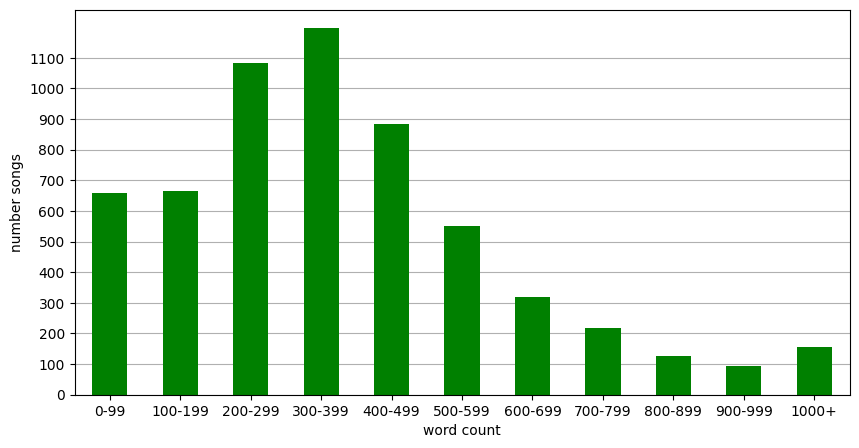

In [97]:
lim = 11
binned = pd.cut(r['len'], [k*100 for k in range(lim)] + [float("inf")], labels=['0-99']+[f'{k}00-{k}99' for k in range(1,lim-1)]+[f'{lim-1}00+'])
p = binned.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(10,5))
p.set_axisbelow(True)
plt.xlabel("word count")
plt.ylabel("number songs")
plt.yticks(np.arange(0, 1200, step=100))
plt.grid(axis='y')
plt.show()

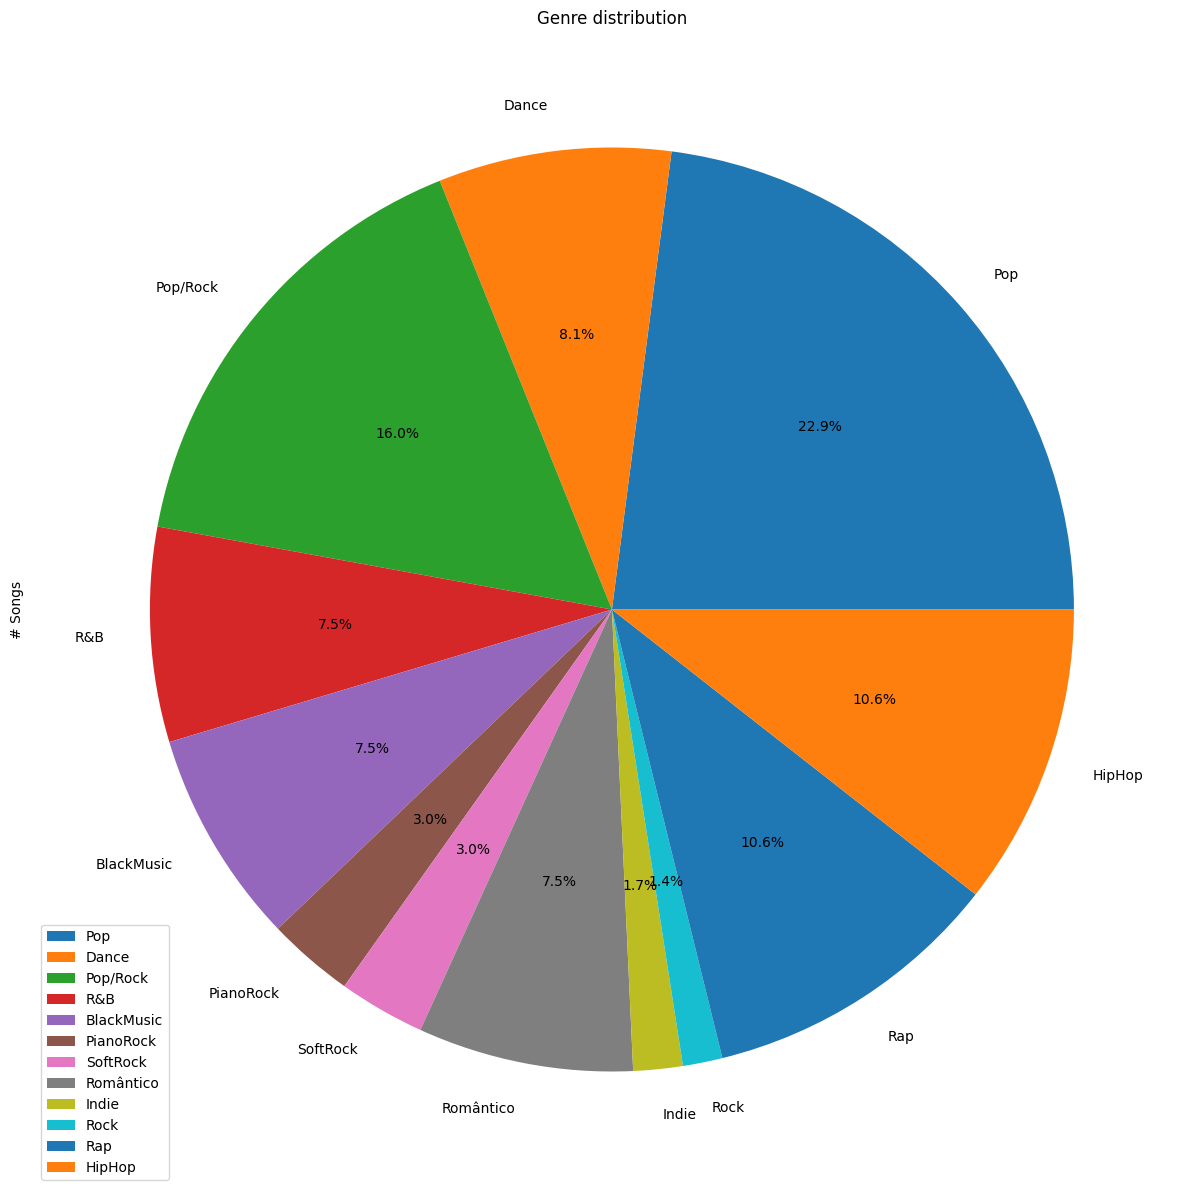

In [124]:
genre_data ={}
for _, row in r.dropna().iterrows():
    genre = row['Genres']
    for g in genre:
        if g not in genre_data:
            genre_data[g] = 0
        genre_data[g] += 1
genres = []
songs = []
for k,v in genre_data.items():
    genres.append(k)
    songs.append(v)
df = pd.DataFrame({'Genre': genres, '# Songs': songs})
df


plot = df.plot.pie(y='# Songs', title="Genre distribution", legend=True, \
                   autopct='%1.1f%%', \
                   startangle=0, labels=genres, figsize=(15,15))